In [44]:
from pathlib import Path
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Dataset

In [212]:
dataset_path = Path("dataset/en")
char_class = 0

images = []
labels = []

for folder_char in sorted(dataset_path.iterdir()):
    if folder_char.is_dir():  # ตรวจสอบว่าเป็นไดเรกทอรี
        #print(folder_char)
        for char in sorted(folder_char.iterdir()):
            if char.is_file() and char.suffix.lower() in ['.png', '.jpg', '.jpeg']:  # ตรวจสอบเฉพาะไฟล์ภาพ
                array_img = cv2.imread(str(char), cv2.IMREAD_GRAYSCALE)
                images.append(array_img)
                labels.append(char_class)
            #cls_name = file.split('_')[0]
        char_class += 1


0


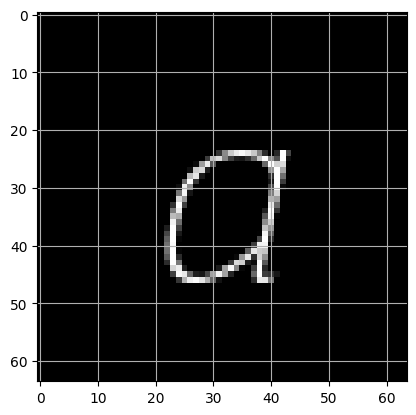

In [213]:
X = np.array(images)
y = np.array(labels)

print(y[2])

idx = 2
img = X[idx]                       # 
plt.imshow(img, cmap=plt.cm.gray_r)      # actutal BG is black
# plt.imshow(img, cmap=plt.cm.gray) 

plt.grid()
plt.show()

# Label Encoding

In [214]:
y, class_names = pd.factorize(y, sort=True)
print(y)
print(class_names)

[ 0  0  0 ... 25 25 25]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


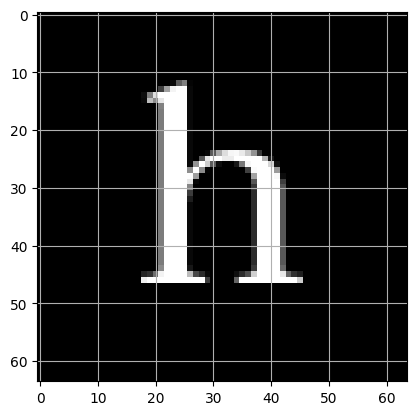

In [215]:
import matplotlib.pyplot as plt
 
idx = 2335
img = X[idx]                       # 
plt.imshow(img, cmap=plt.cm.gray_r)      # actutal BG is black
# plt.imshow(img, cmap=plt.cm.gray) 

plt.grid()
plt.show()

## Train-test Split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

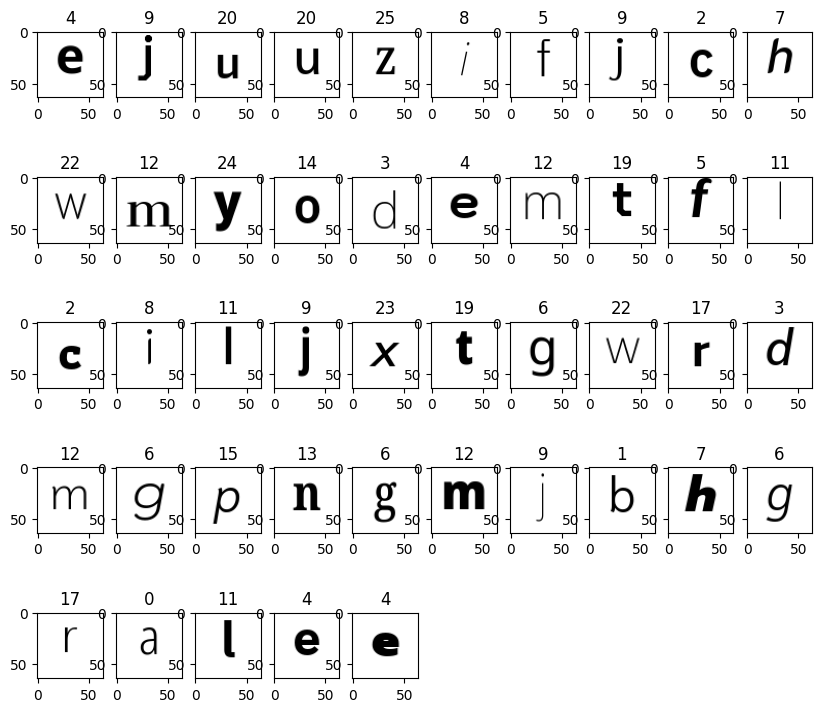

In [217]:
def visual_multi(i):
    nplots = 45
    fig = plt.figure(figsize=(10, 11)) 
    for j in range(nplots):
        plt.subplot(6, 10, j+1)
        plt.imshow(X_train[i+j], cmap=plt.cm.gray)
        plt.title(y_train[i+j])
        # plt.xticks([]); # plt.yticks([])
    plt.show()

visual_multi(0)

In [218]:
print(X_train.shape)
print(X_test.shape)

(6493, 64, 64)
(2165, 64, 64)


## Prepare Dataset (Re-shape the Structure)

In [219]:
X_train = np.expand_dims(X_train, -1)     # run only Once! or  np.squeeze(X_train)
X_test = np.expand_dims(X_test, -1)

In [220]:
# Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [221]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [222]:
print('Train: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test: X={}, y={}'.format(X_test.shape, y_test.shape))

Train: X=(6493, 64, 64, 1), y=(6493,)
Test: X=(2165, 64, 64, 1), y=(2165,)


# Create Model

In [238]:
num_classes = len(np.unique(y_train))
num_classes

26

In [239]:
in_shape = X_train.shape[1:]
in_shape

(64, 64, 1)

In [240]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten #, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape)) 
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu')) 

model.add(Dense(num_classes, activation='softmax'))

/opt/homebrew/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [241]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,930 (6.21 MB)

 Trainable params: 1,627,930 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

In [242]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [243]:
# สมมติว่า y_train และ y_test มีค่าป้ายกำกับที่เป็น string
y_train = np.array([int(label) for label in y_train])
y_test = np.array([int(label) for label in y_test])

In [244]:
import time
start = time.time()

history = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.15) 

end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3228 - loss: 2.4600 - val_accuracy: 0.9209 - val_loss: 0.2965
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9376 - loss: 0.2231 - val_accuracy: 0.9507 - val_loss: 0.1652
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9805 - loss: 0.0756 - val_accuracy: 0.9805 - val_loss: 0.0681
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9961 - loss: 0.0217 - val_accuracy: 0.9908 - val_loss: 0.0440
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9976 - loss: 0.0104 - val_accuracy: 0.9918 - val_loss: 0.0364
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9992 - loss: 0.0077 - val_accuracy: 0.9887 - val_loss: 0.0454
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9998 - loss: 0.0039 - val_accuracy: 0.9949 - val_loss: 0.0327
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9997 - loss: 0.0031 - val_accuracy: 0.9949 - v

In [245]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {:.3f}'.format(score[1]))

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9939 - loss: 0.0256
Accuracy: 0.994


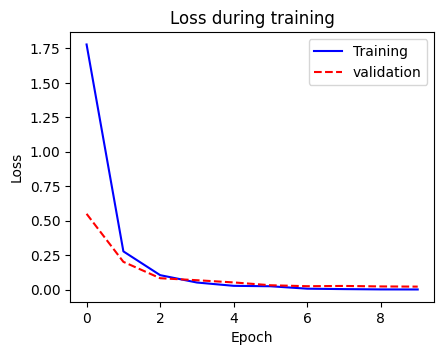

In [230]:
plt.figure(figsize=(4.7, 3.5))
plt.plot(history.history['loss'], color='b', label="Training")
plt.plot(history.history['val_loss'], 'r--', label="validation")
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.title('Loss during training')
plt.legend()
plt.show()

# Predict an image

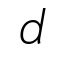

In [256]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale

# conda
#img = load_img('images/alphabet/Screenshot 2024-09-24 143426.jpg', target_size=(64, 64))
#img = load_img('images/alphabet/aa.png', target_size=(64, 64))
#img = load_img('images/alphabet/bbb.png', target_size=(64, 64))
#img = load_img('images/alphabet/b_L_3.png', target_size=(64, 64))
#img = load_img('images/alphabet/a_L_13.png', target_size=(64, 64))
#img = load_img('images/alphabet/c_L_10.png', target_size=(64, 64))
img = load_img('images/alphabet/d_L_22.png', target_size=(64, 64))
#img = load_img('images/alphabet/AAA.png', target_size=(64, 64))
#img = load_img('images/alphabet/Screenshot 2024-09-24 143436.jpg', target_size=(64, 64))
#img = load_img('images/alphabet/Screenshot 2024-09-24 143501.jpg', target_size=(60, 40))
#img = load_img('images/alphabet/D_U_36.png', target_size=(60, 40))
img

In [257]:
from PIL import Image, ImageOps

img = ImageOps.invert(img)
img = img_to_array(img)
img = rgb_to_grayscale(img)

print('shape=',img.shape)
print('max pixel value=',np.max(img))

img = img /255.0
print('max pixel value=',np.max(img))

img = np.expand_dims(img, axis=0)
img.shape

shape= (64, 64, 1)
max pixel value= 254.97452
max pixel value= 0.99990004


(1, 64, 64, 1)

In [258]:
y_pred = model.predict(img)
print(y_pred.round(3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


In [249]:
predicted = np.argmax(y_pred, -1) 
print(predicted)

[12]


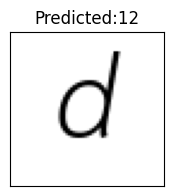

In [250]:
plt.figure(figsize=(2, 2))
plt.imshow(img[0].reshape(64, 64), cmap=plt.cm.gray_r)
plt.title('Predicted:{}'. format(predicted[0]))
plt.xticks([])
plt.yticks([])
plt.show()